In [77]:
#Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn import metrics




Importing Dataset:

Using Breast cancer data in order to predict the cancer

In [59]:
# reading data into dataframe
df = pd.read_csv('/content/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [60]:
#Checking if the data we are using is cleaned so it wont affect the accuracy of our model
df.isnull().sum()


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [61]:
# unnamed column was useless so I dropped it
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)


In [62]:
# This is our target variable
df["diagnosis"].value_counts()


B    357
M    212
Name: diagnosis, dtype: int64

In [63]:
# M in medical terms is 'Malignan' which means that cancer can spread
# B is Benign which means the cancer wont spread
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [64]:
# checking correlation of independent variable with dependent variable i.e diagnosis
df.corr()['diagnosis'].sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

In [65]:
# independant variables
x=df.drop(["diagnosis"],axis=1)
y = df["diagnosis"].values.reshape(-1,1)  #target
print('shape of x : {} \nshape of y : {}'.format(x.shape , y.shape))

shape of x : (569, 30) 
shape of y : (569, 1)


In [66]:
def SVM_Model(x, y, testSize):

    global x_train , x_test , y_train , y_test , y_pred

    rows = []

    for n in testSize:
        x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = n , random_state = 0)

        # Create SVM model
        svc=SVC(kernel='linear')

        # fit SVM to training set
        svc.fit(x_train,y_train)

        # make predictions on test set
        y_pred=svc.predict(x_test)

        dataset = {'Test_size': n, 'acc': metrics.accuracy_score(y_test, y_pred), 'score': svc.score(x, y)}
        rows.append(dataset)
        evaluation3 = pd.DataFrame(rows)

    return (evaluation3)
# We want to hightlight the maximume values
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

In [67]:
evaluation = SVM_Model(x, y, [0.1, 0.15, 0.2, 0.25, 0.3])
evaluation.style.apply(highlight_max)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

,Test_size,acc,score
0,0.100000,0.964912,0.966608
1,0.150000,0.953488,0.964851
2,0.200000,0.956140,0.963093
3,0.250000,0.958042,0.964851
4,0.300000,0.959064,0.963093


In [68]:
#split X and y in training and test set in 70:30 ratio
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state = 0)


In [69]:
# Creating SVM model
svm=SVC(kernel='linear',random_state = 1)

svm.fit(x_train,y_train)

y_pred=svm.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
# Returning the classification metrics for multi_class probelm.

def Report(y_test , y_pred):
    print('Accuracy : {}% \n'.format(accuracy_score(y_test , y_pred)*100))
    print('Confusion Matrix : \n\n{}\n'.format(confusion_matrix(y_test , y_pred)))
    print('Classification Report : \n\n{}'.format(classification_report(y_test , y_pred)))

def multi_class_metrics(y_true, y_pred):
    print(f'Accuracy  : ', round(metrics.accuracy_score(y_true, y_pred), 3))
    print(f'Precision : ', round(metrics.precision_score(y_true, y_pred, average = 'micro'), 3))
    print(f'Recall    : ', round(metrics.recall_score(y_true, y_pred, average = 'micro'), 3))
    print(f'f1        : ', round(metrics.f1_score(y_true, y_pred, average = 'micro'), 3))

In [71]:
Report(y_test , y_pred)


Accuracy : 95.90643274853801% 

Confusion Matrix : 

[[103   5]
 [  2  61]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       108
           1       0.92      0.97      0.95        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



Grid Search CV:

After applying sklearn library,first model has 95% train accuracy

But in order to increase these scores? I used gridsearch method

It is a common method for tuning parameters

In [72]:
kernel=["linear","rbf"]
gamma=["auto",0.01,0.001,0.0001,1]
decision_function_shape=["ovo","ovr"]

In [73]:
#  Searching through combinations of parameters defined in kernel, gamma, and decision_function_shape to find the best settings based on the training data
svm=SVC(random_state=1)
grid_svm=GridSearchCV(estimator=svm,cv=5,  param_grid=dict(kernel=kernel,
                                                         gamma=gamma,
                                                         decision_function_shape=decision_function_shape))
grid_svm.fit(x_train,y_train)
print("best score: ", grid_svm.best_score_)
print("best param: ", grid_svm.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

best score:  0.9548417721518987
best param:  {'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'linear'}


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

45
45


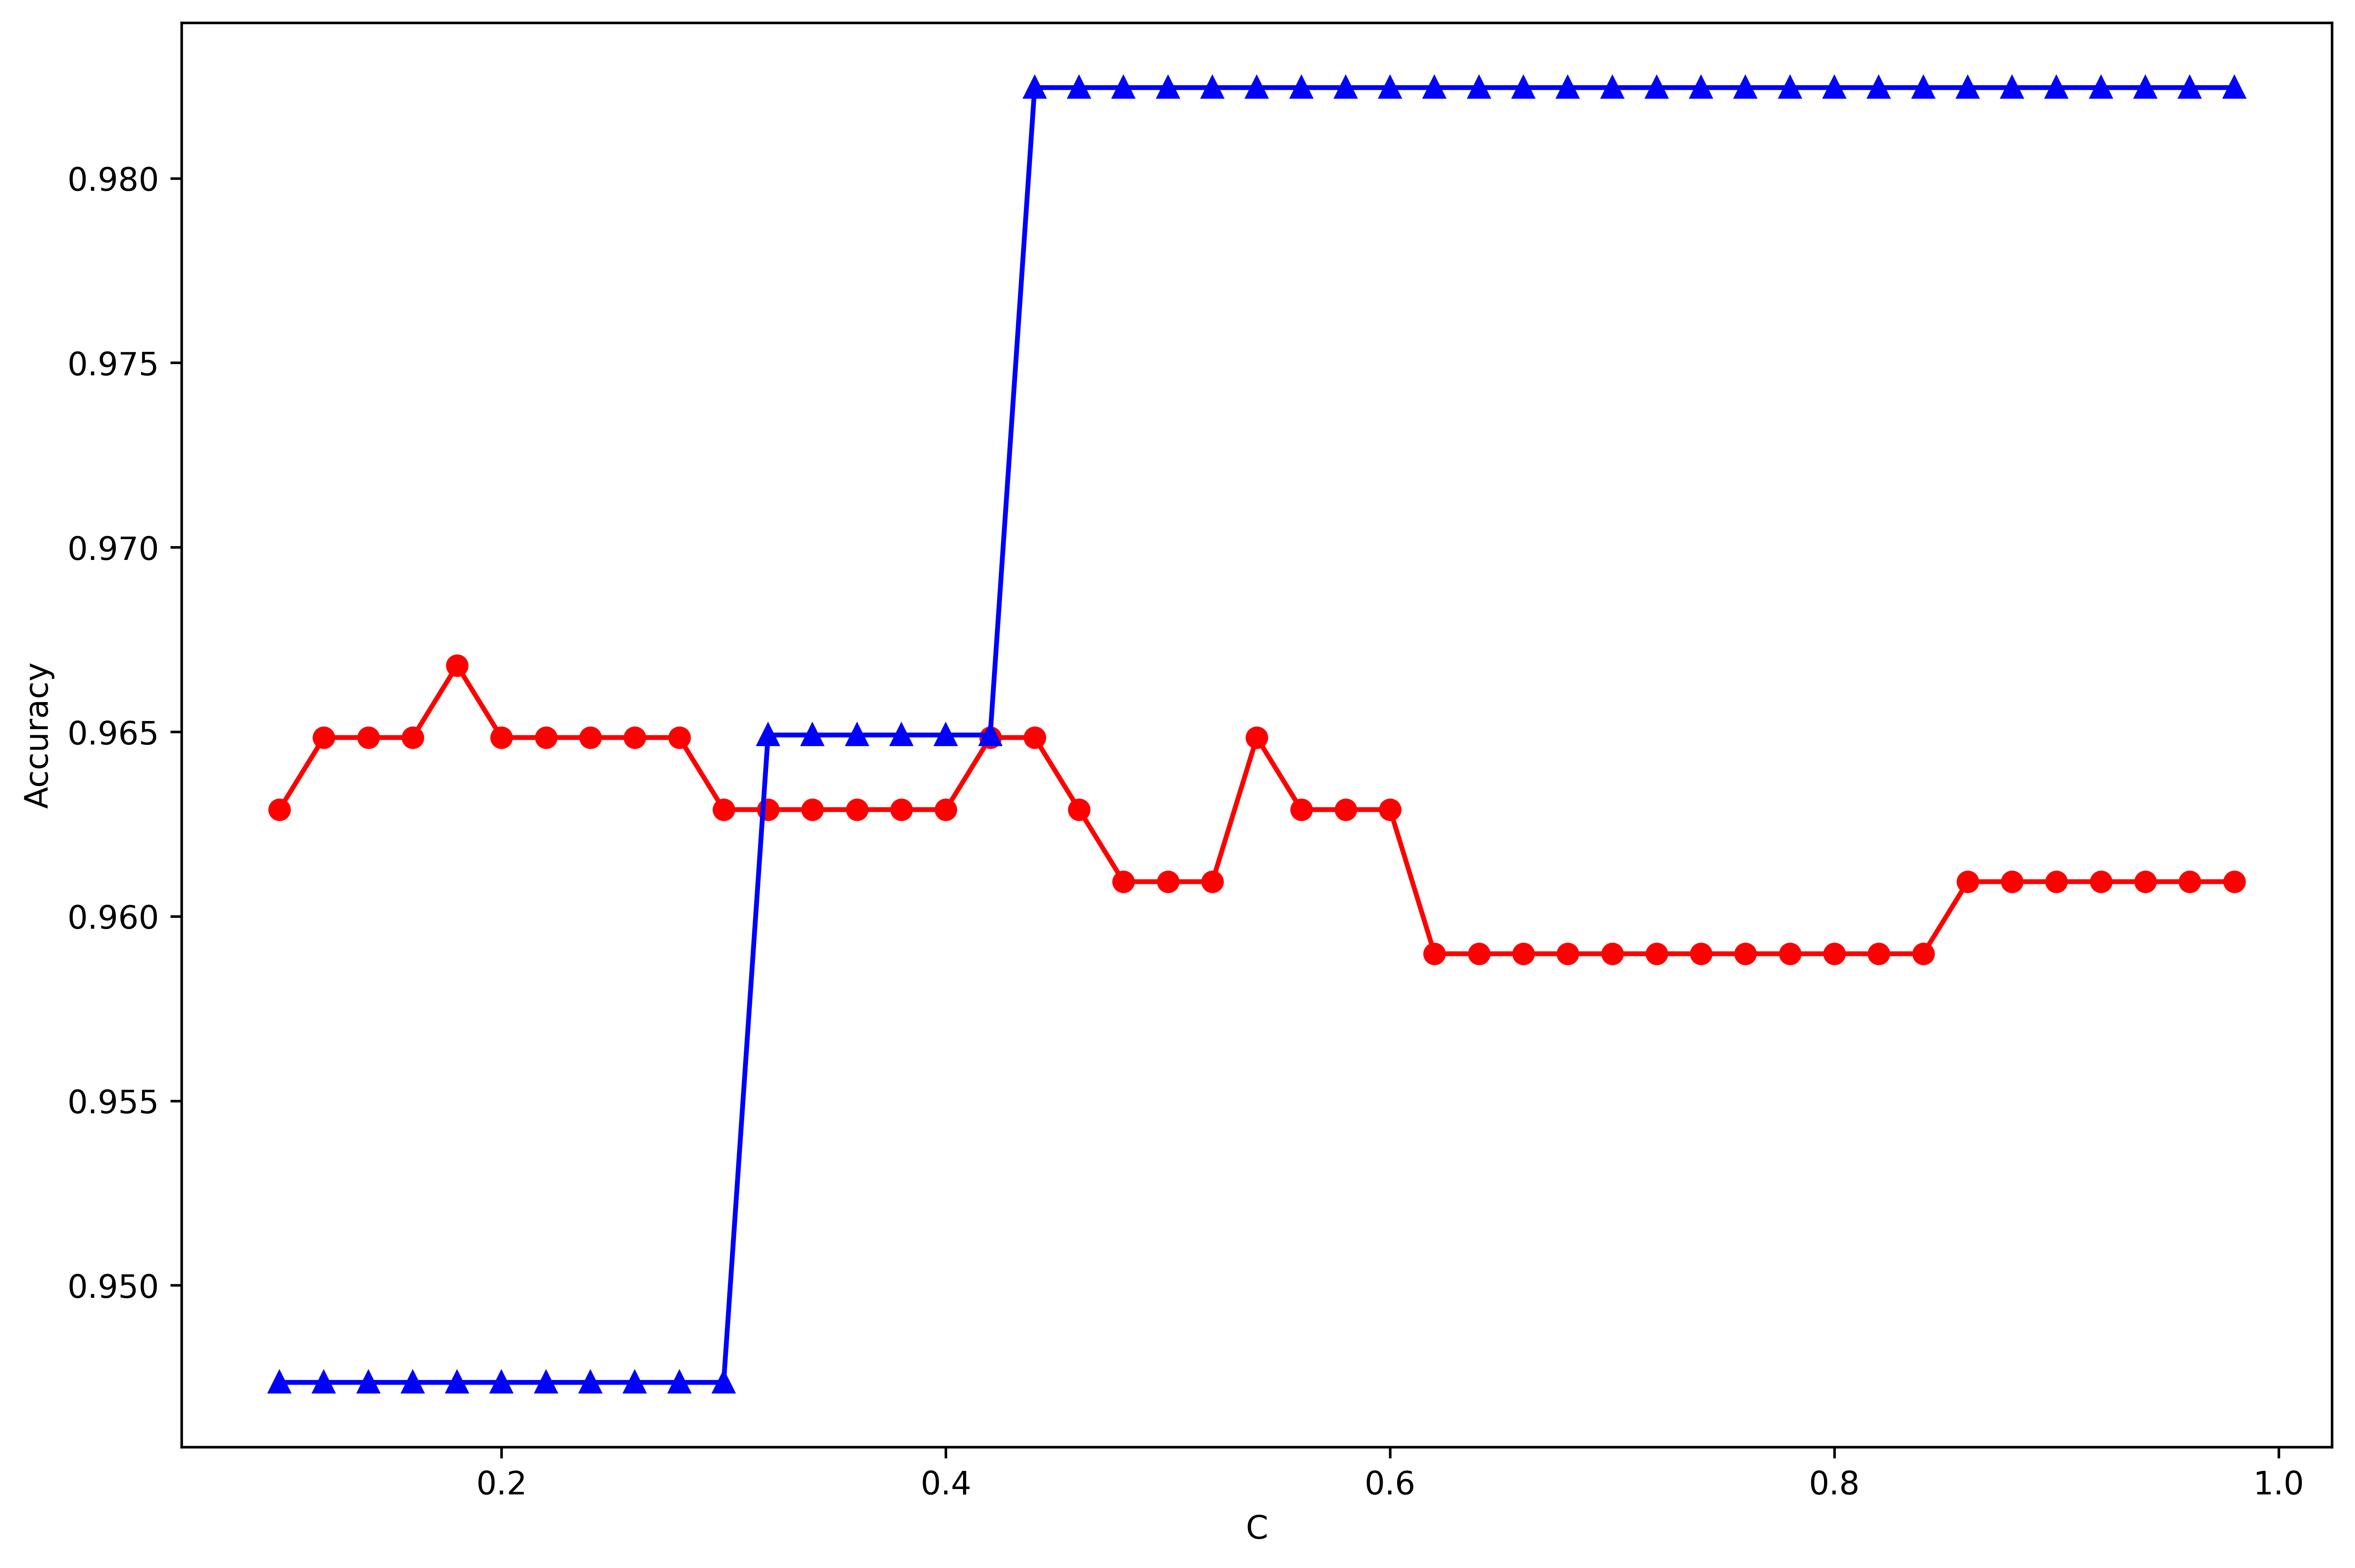

In [74]:
train_score, test_score = [], []
x = df.drop('diagnosis', axis=1)
y = df['diagnosis'].values.reshape(-1, 1) #Target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, shuffle = True, random_state = 1)

for i in np.arange(0.1,1,0.02):
    svm = SVC(random_state = 1, kernel = 'linear', decision_function_shape = 'ovo', C = i)
    svm.fit(x_train, y_train)
    train_score.append(svm.score(x_train, y_train))
    test_score.append(svm.score(x_test, y_test))

print(len(train_score))
print(len(test_score))

plt.figure(figsize = (12, 8), dpi = 600)
plt.plot(np.arange(0.1, 1, 0.02), train_score, marker = 'o', color = 'red', label = 'Train')
plt.plot(np.arange(0.1, 1, 0.02), test_score, marker = '^', color = 'blue', label = 'Test')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()


According to the plot above, model with "linear" kernel performs best when "C" is equal to 0.5

Now lets build the model with the best parameters we have found with the Gridsearch method.

In [75]:
svm1=SVC(C=0.5,decision_function_shape="ovo",gamma="auto",kernel="linear",random_state=1)
svm1.fit(x_train,y_train)
y_pred = svm1.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [76]:
Report(y_test , y_pred)


Accuracy : 98.24561403508771% 

Confusion Matrix : 

[[34  0]
 [ 1 22]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       1.00      0.96      0.98        23

    accuracy                           0.98        57
   macro avg       0.99      0.98      0.98        57
weighted avg       0.98      0.98      0.98        57



The model has achieved a very good accuracy of 98%